In [13]:
#importint the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from dotenv import dotenv_values,load_dotenv
import os


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [14]:
ENV = dotenv_values(".env")
load_dotenv(override=False)

True

In [15]:
#first we upload the dataset 

#Primero cargaremos nuestro set de datos

xls = pd.ExcelFile(os.environ['DATASETS_PATH'] + '/BostonHousing.xlsx')
fileName = os.environ['DATASETS_PATH'] + '/BostonHousing.xlsx'
df_house = pd.read_excel(fileName, sheet_name='Data')
descritive = df_house.describe()
#split the data in train abd test
df_house
print(descritive)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [16]:
#pairplot 
"""sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grip = sns.pairplot(data = df_house, vars= df_house.columns[0:13])
grip"""

"sns.set(font_scale=1.1)\nsns.set_style('whitegrid')\ngrip = sns.pairplot(data = df_house, vars= df_house.columns[0:13])\ngrip"

               CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN        -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS      0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX        0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM        -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS       -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD        0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO    0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
LSTAT      0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
MEDV      -0.388305  0.360445 -0.483725  0.175260 -

<Axes: >

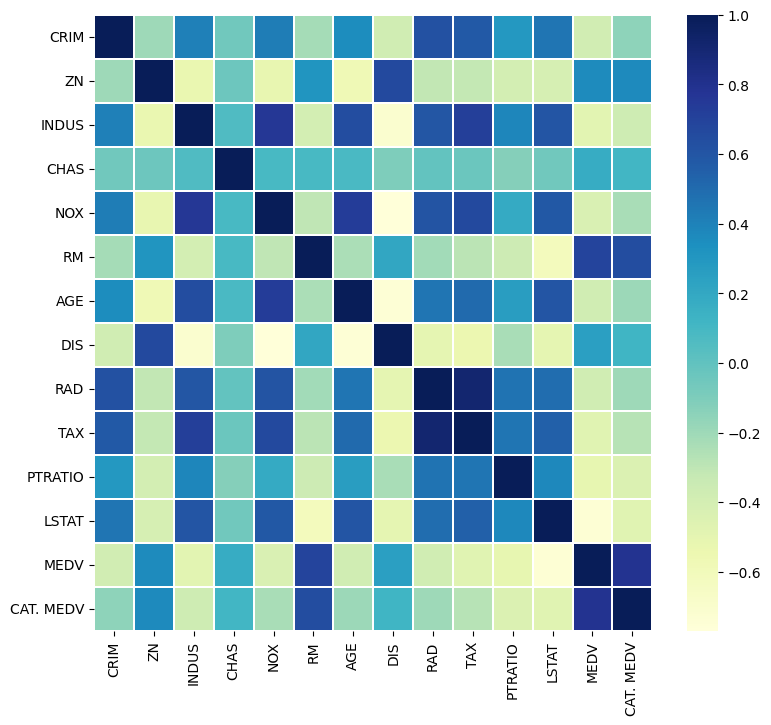

In [17]:
#getting the correlation 
#del anterior grafico podemos remover CHAS

print(df_house.corr())

corrmat = df_house.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

        CRIM    ZN  INDUS  CHAS     RM     DIS  RAD  TAX  PTRATIO  MEDV  \
0    0.00632  18.0   2.31     0  6.575  4.0900    1  296     15.3  24.0   
1    0.02731   0.0   7.07     0  6.421  4.9671    2  242     17.8  21.6   
2    0.02729   0.0   7.07     0  7.185  4.9671    2  242     17.8  34.7   
3    0.03237   0.0   2.18     0  6.998  6.0622    3  222     18.7  33.4   
4    0.06905   0.0   2.18     0  7.147  6.0622    3  222     18.7  36.2   
..       ...   ...    ...   ...    ...     ...  ...  ...      ...   ...   
501  0.06263   0.0  11.93     0  6.593  2.4786    1  273     21.0  22.4   
502  0.04527   0.0  11.93     0  6.120  2.2875    1  273     21.0  20.6   
503  0.06076   0.0  11.93     0  6.976  2.1675    1  273     21.0  23.9   
504  0.10959   0.0  11.93     0  6.794  2.3889    1  273     21.0  22.0   
505  0.04741   0.0  11.93     0  6.030  2.5050    1  273     21.0  11.9   

     CAT. MEDV  
0            0  
1            0  
2            1  
3            1  
4            1

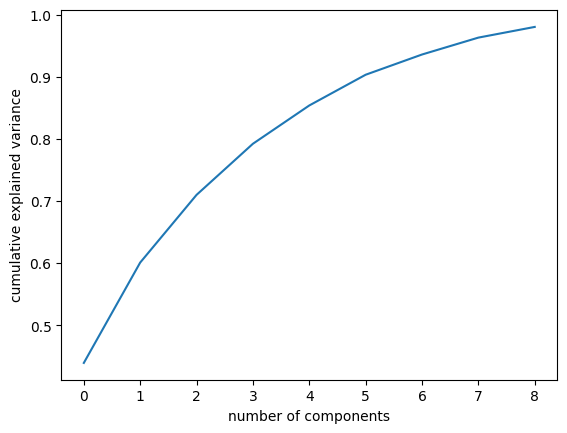

In [18]:
X,y = df_house,df_house
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=0)
sc = StandardScaler()

X_train_std2 = sc.fit_transform(X_train2)
X_test_std2 = sc.transform(X_test2)

df_house = df_house.drop(df_house.columns[4],axis=1)
df_house = df_house.drop(df_house.columns[5],axis=1)
df_house = df_house.drop(df_house.columns[9],axis=1)
print(df_house)
X,y = df_house,df_house
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#number of compoenents
pca =  PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl))

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()




In [19]:
#number of compoenents
pca_graf =  PCA(n_components=5)
X_train_pca = pca_graf.fit_transform(X_train_std)
X_test_pca = pca_graf.transform(X_test_std)

In [20]:
#elbow method Plot

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

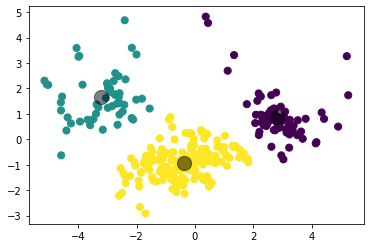

In [19]:
from sklearn.cluster import KMeans

pca_graf =  PCA(n_components=5)
X_train_pca = pca_graf.fit_transform(X_train_std)
X_test_pca = pca_graf.transform(X_test_std)

kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300,tol=1e-04, random_state=0)
kmeans.fit(X_train_pca)
y_kmeans = kmeans.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

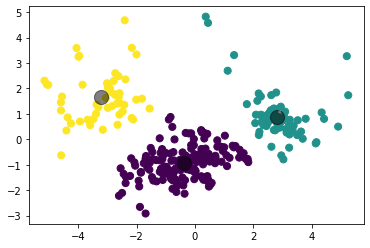

In [20]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0)
kmeans.fit(X_train_pca)
y_kmeans = kmeans.fit_predict(X_train_pca)


scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [21]:
house_pca_df = pd.DataFrame(X_train_pca,columns=['Component1','Component2','Component3','Component4','Component5'])
house_pca_df


,Component1,Component2,Component3,Component4,Component5
0,-4.587474,1.133468,1.774669,0.043615,1.401033
1,0.764414,-0.040302,-1.113287,-1.301168,1.538320
2,0.307644,0.260029,-1.203451,-1.303584,1.341988
3,0.422634,0.212048,-1.182765,-1.312258,1.374417
4,-1.162081,-1.180748,0.786715,0.570414,-0.609060
...,...,...,...,...,...
298,-0.023727,-1.570415,-0.319889,-0.061233,-0.236158
299,-3.367864,1.371558,1.152082,-0.110360,0.246576
300,0.355113,-0.556283,-0.568794,-0.563483,0.213919
301,-0.655790,-1.651379,-0.322143,-0.159073,0.146417


In [22]:
house_pca_df['labels']= kmeans.labels_
house_pca_df

#scatter = plt.scatter(house_pca_df[:, 0], house_pca_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

,Component1,Component2,Component3,Component4,Component5,labels
0,-4.587474,1.133468,1.774669,0.043615,1.401033,2
1,0.764414,-0.040302,-1.113287,-1.301168,1.538320,0
2,0.307644,0.260029,-1.203451,-1.303584,1.341988,0
3,0.422634,0.212048,-1.182765,-1.312258,1.374417,0
4,-1.162081,-1.180748,0.786715,0.570414,-0.609060,0
...,...,...,...,...,...,...
298,-0.023727,-1.570415,-0.319889,-0.061233,-0.236158,0
299,-3.367864,1.371558,1.152082,-0.110360,0.246576,2
300,0.355113,-0.556283,-0.568794,-0.563483,0.213919,0
301,-0.655790,-1.651379,-0.322143,-0.159073,0.146417,0


In [23]:
#print(kmeans.labels_)
#print(X_train)

#for label in kmeans.labels_:
#df_house.insert(2,kmeans.labels_,True)
X_train

X_train['label'] = kmeans.labels_

X_train


/Users/josetoribio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,TAX,PTRATIO,MEDV,CAT. MEDV,label
198,0.03768,80.0,1.52,0,7.274,7.3090,2,329,12.6,34.6,1,2
145,2.37934,0.0,19.58,0,6.130,1.4191,5,403,14.7,13.8,0,0
158,1.34284,0.0,19.58,0,6.066,1.7573,5,403,14.7,24.3,0,0
150,1.65660,0.0,19.58,0,6.122,1.6180,5,403,14.7,21.5,0,0
250,0.14030,22.0,5.86,0,6.487,7.3967,7,330,19.1,24.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,5.708,4.7211,5,287,19.6,18.5,0,0
192,0.08664,45.0,3.44,0,7.178,6.4798,5,398,15.2,36.4,1,2
117,0.15098,0.0,10.01,0,6.021,2.7474,6,432,17.8,19.2,0,0
47,0.22927,0.0,6.91,0,6.030,5.6894,3,233,17.9,16.6,0,0


In [24]:
#X_train.columns
#X_train[X_train["label"] == 1][1].values[0]
#years = [1]
#X_train[~X_train.label.isin(years)]
#X_train[X_train['label']== 0].tolist()
X,y = df_house,df_house
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
sc = StandardScaler()
X_train2['label'] = kmeans.labels_
labelZero = X_train2.loc[X_train2['label'] == 0]
print(labelZero.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     0.421121   10.611765    9.544647    0.064706    0.522094    6.119547   
std      0.673586   21.386051    6.255632    0.246733    0.107754    0.400255   
min      0.006320    0.000000    1.250000    0.000000    0.385000    4.926000   
25%      0.063015    0.000000    5.145000    0.000000    0.448000    5.876250   
50%      0.140900    0.000000    8.140000    0.000000    0.510000    6.070500   
75%      0.362173   12.500000   10.810000    0.000000    0.547000    6.404250   
max      4.097400   85.000000   25.650000    1.000000    0.871000    7.007000   

              AGE        DIS         RAD         TAX     PTRATIO       LSTAT  \
count  170.000000  170.00000  170.000000  170.000000  170.000000  170.000000   
mean    63.691176    4.33296    4.364706  315.123529   18.414118   12.015059   
std     28.834568    2.11804  

In [25]:
labelone = X_train2.loc[X_train2['label'] == 1]
print(labelone.describe())

            CRIM    ZN      INDUS       CHAS        NOX         RM  \
count  81.000000  81.0  81.000000  81.000000  81.000000  81.000000   
mean   11.672900   0.0  18.576049   0.074074   0.673642   6.039741   
std    13.602187   0.0   2.101672   0.263523   0.062135   0.758980   
min     0.111320   0.0  18.100000   0.000000   0.532000   3.561000   
25%     4.898220   0.0  18.100000   0.000000   0.614000   5.683000   
50%     8.200580   0.0  18.100000   0.000000   0.693000   6.185000   
75%    12.802300   0.0  18.100000   0.000000   0.713000   6.417000   
max    88.976200   0.0  27.740000   1.000000   0.770000   8.780000   

              AGE        DIS        RAD         TAX    PTRATIO      LSTAT  \
count   81.000000  81.000000  81.000000   81.000000  81.000000  81.000000   
mean    90.892593   2.087277  23.012346  668.222222  20.195062  18.180494   
std     10.886813   0.618804   4.360315    9.810708   0.021802   6.881945   
min     40.300000   1.174200   4.000000  666.000000  20.10000

In [26]:
labelTwo = X_train2.loc[X_train2['label'] == 2]
print(labelTwo.describe())

            CRIM          ZN      INDUS       CHAS        NOX         RM  \
count  52.000000   52.000000  52.000000  52.000000  52.000000  52.000000   
mean    0.283525   35.682692   4.597692   0.076923   0.485327   7.322173   
std     0.418855   34.876818   4.097456   0.269069   0.082267   0.551348   
min     0.009060    0.000000   0.460000   0.000000   0.394000   6.144000   
25%     0.033285    0.000000   2.460000   0.000000   0.426500   6.926750   
50%     0.080365   20.000000   3.440000   0.000000   0.447000   7.194000   
75%     0.513907   75.000000   6.200000   0.000000   0.507000   7.709500   
max     2.010190  100.000000  19.580000   1.000000   0.647000   8.704000   

              AGE        DIS        RAD         TAX    PTRATIO      LSTAT  \
count   52.000000  52.000000  52.000000   52.000000  52.000000  52.000000   
mean    54.092308   4.464325   4.288462  280.057692  15.913462   5.231154   
std     28.056825   2.099241   1.882182   63.282874   1.982277   2.380600   
min    

In [27]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0)

kmeans.fit(X_train_pca)
y_kmeans = kmeans.fit_predict(X_train_pca)
X_train_pca
house_pca_df = pd.DataFrame(X_train_pca,columns=['Component1','Component2','Component3','Component4','Component5'])

house_pca_df['label'] = X_train.label
kmeans.color_

house_pca_df

#axes = sns.scatterplot(data =house_pca_df , hue='label',legend='brief', palette='cool')
classes = ['0', '1', '2']
colours = ListedColormap(['r','b','g'])
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.legend(handles=scatter.legend_elements()[0], labels=classes)


AttributeError: 'DataFrame' object has no attribute 'label'

            CRIM
label           
0       0.421121
1      11.672900
2       0.283525


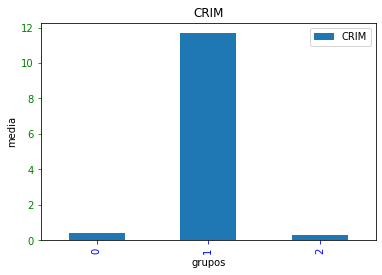

In [36]:
#groupName = X_train2.groupby(['label'])
#df_CRIM = X_train2.loc[X_train2['CRIM']]
df = X_train2[['CRIM', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("CRIM")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()
#df_CRIM = X_train2['CRIM','label']
#df_CRIM


              ZN
label           
0      10.611765
1       0.000000
2      35.682692


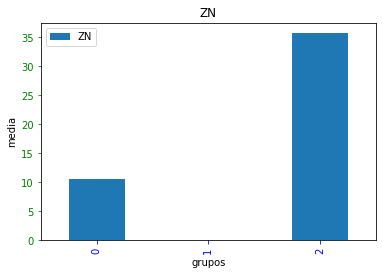

In [37]:
df = X_train2[['ZN', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("ZN")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()

             RM
label          
0      6.119547
1      6.039741
2      7.322173


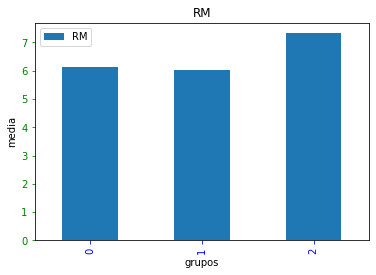

In [38]:
df = X_train2[['RM', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("RM")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()

            NOX
label          
0      0.522094
1      0.673642
2      0.485327


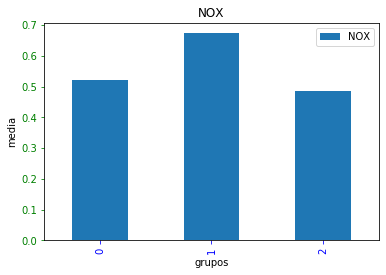

In [39]:
df = X_train2[['NOX', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("NOX")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()

           INDUS
label           
0       9.544647
1      18.576049
2       4.597692


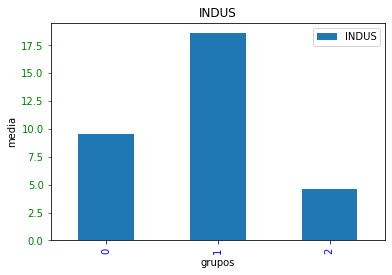

In [40]:
df = X_train2[['INDUS', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("INDUS")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()

              TAX
label            
0      315.123529
1      668.222222
2      280.057692


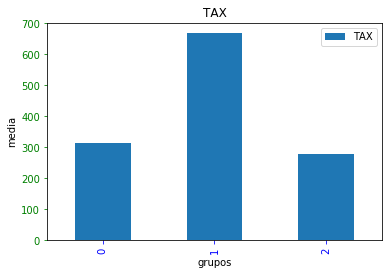

In [41]:
df = X_train2[['TAX', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("TAX")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()

             RAD
label           
0       4.364706
1      23.012346
2       4.288462


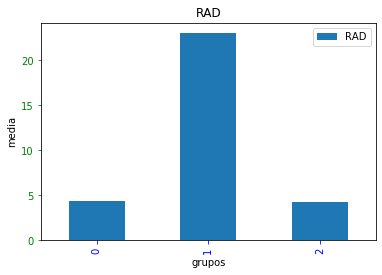

In [42]:
df = X_train2[['RAD', 'label']]

df

data2 = df.groupby(['label']).mean()
index = np.arange(6)
bar_width = 0.35

print(data2)

data2.plot.bar()
#Set descriptions:
plt.title("RAD")
plt.ylabel('media')
plt.xlabel('grupos')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.show()